In [1]:
#Import modules
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import plotly.express as px

#load read count dataset
rc_df = pd.read_csv("2.2a_ex1_featurecounts.tsv",sep="\t",comment='#')
rc_df

,Geneid,Chr,Start,End,Strand,Length,bam/RS411-nasc-1.bam,bam/RS411-nasc-2.bam,bam/RS411-nasc-3.bam,bam/SEM-nasc-1.bam,bam/SEM-nasc-2.bam,bam/SEM-nasc-3.bam
0,DDX11L1,chr1;chr1;chr1,11874;12613;13221,12227;12721;14409,+;+;+,1652,9,6,8,8,8,6
1,WASH7P,chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;c...,14362;14970;15796;16607;16858;17233;17606;1791...,14829;15038;15947;16765;17055;17368;17742;1806...,-;-;-;-;-;-;-;-;-;-;-,1769,132,86,105,93,102,135
2,FAM138A,chr1;chr1;chr1;chr19;chr19;chr19,34611;35277;35721;76220;76886;77330,35174;35481;36081;76783;77090;77690,-;-;-;-;-;-,2260,0,0,0,0,0,0
3,FAM138F,chr1;chr1;chr1;chr19;chr19;chr19,34611;35277;35721;76220;76886;77330,35174;35481;36081;76783;77090;77690,-;-;-;-;-;-,2260,0,0,0,0,0,0
4,OR4F5,chr1,69091,70008,+,918,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
23705,CDY1B,chrY;chrY;chrY;chrY;chrY;chrY,26191377;26191940;26192244;27768264;27768264;2...,26191823;26194161;26194161;27770181;27770485;2...,-;-;-;+;+;+,5338,0,0,0,0,0,0
23706,CDY1,chrY;chrY;chrY;chrY;chrY;chrY,26191377;26191940;26192244;27768264;27768264;2...,26191823;26194161;26194161;27770181;27770485;2...,-;-;-;+;+;+,5338,0,0,0,0,0,0
23707,CSPG4P1Y,chrY;chrY;chrY;chrY,26329581;26332656;27629055;27632781,26329652;26333378;27629777;27632852,-;-;+;+,1590,0,0,0,0,0,0
23708,GOLGA2P3Y,chrY;chrY;chrY;chrY;chrY;chrY;chrY;chrY;chrY;c...,26356114;26356280;26356462;26356906;26357415;2...,26356197;26356372;26356650;26356994;26357489;2...,-;-;-;-;-;-;-;-;-;+;+;+;+;+;+;+;+;+,2124,0,0,0,0,0,0


In [2]:
#Rename columns and remove unwanted columns (Chr, Start, End, Strand, Length)
rc_df2 = rc_df.drop(['Chr','Start','End','Strand','Length'],axis=1)

rc_df2.rename(columns={'bam/RS411-nasc-1.bam':'RS411-1','bam/RS411-nasc-2.bam':'RS411-2','bam/RS411-nasc-3.bam':'RS411-3',
                      'bam/SEM-nasc-1.bam':'SEM-1','bam/SEM-nasc-2.bam':'SEM-2','bam/SEM-nasc-3.bam':'SEM-3'},inplace=True)
rc_df2

,Geneid,RS411-1,RS411-2,RS411-3,SEM-1,SEM-2,SEM-3
0,DDX11L1,9,6,8,8,8,6
1,WASH7P,132,86,105,93,102,135
2,FAM138A,0,0,0,0,0,0
3,FAM138F,0,0,0,0,0,0
4,OR4F5,0,0,0,0,0,0
...,...,...,...,...,...,...,...
23705,CDY1B,0,0,0,0,0,0
23706,CDY1,0,0,0,0,0,0
23707,CSPG4P1Y,0,0,0,0,0,0
23708,GOLGA2P3Y,0,0,0,0,0,0


In [3]:
#Filter out genes with no counts
#iloc / loc and sum
rc_df2=rc_df2.set_index('Geneid')
#rc_df2['total'] = rc_df2['RS411-1']+rc_df2['RS411-2']+rc_df2['RS411-3']+rc_df2['SEM-1']+rc_df2['SEM-2']+rc_df2['SEM-3']
rc_df2['total'] = rc_df2.sum(axis=1)
#rc_df2

mask = (rc_df2['total'] > 1000)
mask.to_frame()
rc_df3 = rc_df2[mask]
rc_df3
rc_df4=rc_df3.drop('total',axis=1)
rc_df4

,RS411-1,RS411-2,RS411-3,SEM-1,SEM-2,SEM-3
Geneid,,,,,,
LOC643837,301,194,230,220,233,256
NOC2L,507,438,470,465,546,498
SDF4,660,484,562,445,569,502
B3GALT6,647,520,656,508,760,549
UBE2J2,413,289,344,304,434,346
...,...,...,...,...,...,...
DKC1,1891,1363,1660,1422,1786,1539
FUNDC2,205,163,193,151,241,183
BRCC3,311,232,246,222,237,193


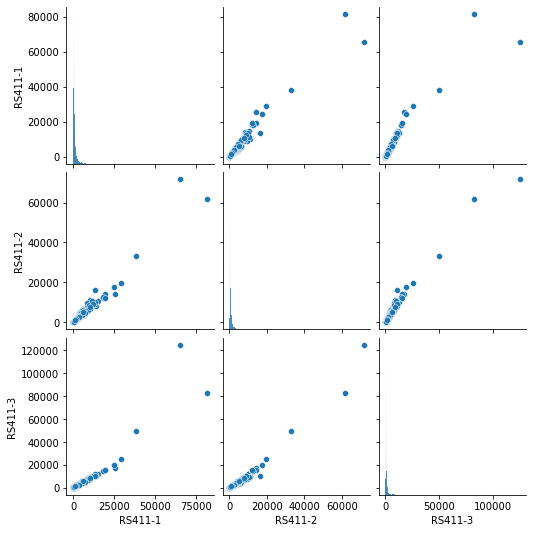

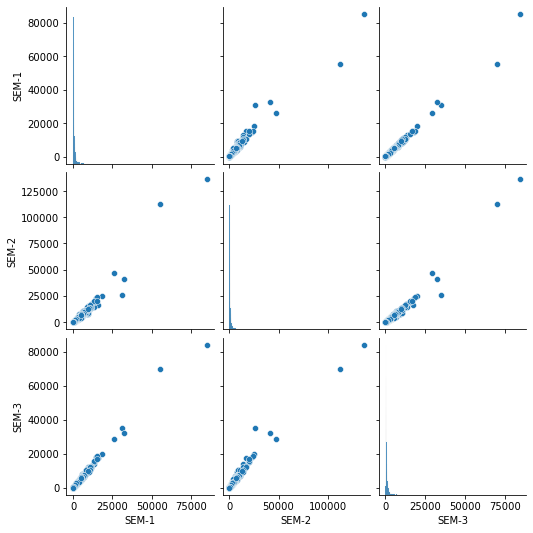

In [4]:
#Plot scatter plot of correlation of replicates
#scatter_df = plotly.data.rc_df4()
#sns.scatterplot(data=rc_df4, x='RS411-1', y='RS411-2')
RS411_df=rc_df4[['RS411-1','RS411-2','RS411-3']]
sns.pairplot(data=RS411_df)
SEM_df=rc_df4[['SEM-1','SEM-2','SEM-3']]
sns.pairplot(data=SEM_df)

In [5]:
#Tidy data
#long form
tidy_df=rc_df4.reset_index().melt(id_vars='Geneid',var_name='sample',value_name='count')
tidy_df
#wide form
#wide_df=tidy_df.pivot(index='geneid',columns='variable',values='values')

,Geneid,sample,count
0,LOC643837,RS411-1,301
1,NOC2L,RS411-1,507
2,SDF4,RS411-1,660
3,B3GALT6,RS411-1,647
4,UBE2J2,RS411-1,413
...,...,...,...
48325,DKC1,SEM-3,1539
48326,FUNDC2,SEM-3,183
48327,BRCC3,SEM-3,193
48328,VBP1,SEM-3,234


(0.0, 1000.0)

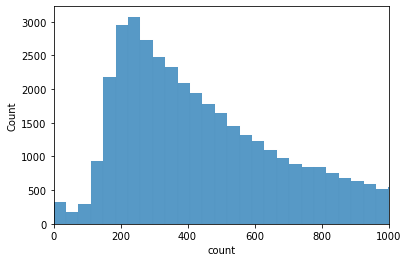

In [6]:
#Plot histogram and density plot of read counts across all samples
sns.histplot(data=tidy_df,x='count')
plt.xlim(0,1000)

(0.0, 5000.0)

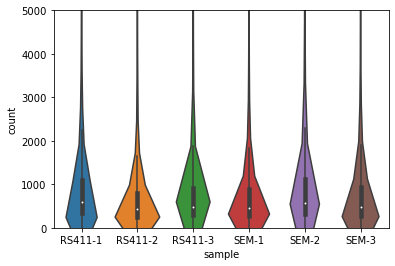

In [7]:
#Plot a violin plot of read counts per sample
sns.violinplot(data=tidy_df,x='sample',y='count')
plt.ylim(0,5000)

In [8]:
#Identify 10 genes with highest expression in each sample
ranked_df=tidy_df.sort_values(['sample','count'],ascending=False).groupby('sample').head(10)
top10=ranked_df.drop('count',axis=1)
top10=top10.set_index('sample')
top10=top10.reset_index()
ranking=list(range(1, 11))*6
top10['ranking']=ranking
top10=top10.set_index('ranking')
top10_names=top10.pivot(columns='sample',values='Geneid')
top10_names

sample,RS411-1,RS411-2,RS411-3,SEM-1,SEM-2,SEM-3
ranking,,,,,,
1,MIR3648,MIR663A,MIR663A,MIR663A,MIR663A,MIR663A
2,MIR663A,MIR3648,MIR3648,MIR3648,MIR3648,MIR3648
3,MIR3687,MIR3687,MIR3687,PAN3,MIR3687,MALAT1
4,ACTG1,ACTG1,ACTG1,MALAT1,PAN3,PAN3
5,MALAT1,CDK6,CDK6,MIR3687,MALAT1,MIR3687
6,CDK6,RMRP,MALAT1,ACTG1,ACTG1,ACTG1
7,HSPA8,MALAT1,HSPA8,ZFP36L1,HIST1H1D,HIST1H1D
8,ACTB,HSPA8,ACTB,ACTB,HIST1H3B,HIST1H3B
9,TUBB,EEF1A1,TUBB,HIST1H1D,ACTB,ZFP36L1


In [9]:
#Normalise read counts to total reads per sample and convert to CPM
#split_df=tidy_df.groupby('sample').sum()
totals=tidy_df.groupby('sample')['count'].transform('sum')
tidy_df['totals']=totals
#tidy_df.eval('CPM = (count/totals) * 1e6')
CPM=tidy_df['count']/tidy_df['totals']*1000000
tidy_df['CPM']=CPM
#Log transform normalised read counts
tidy_df['log']=np.log2(tidy_df['CPM'])
tidy_df

/Users/danfountain/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)


,Geneid,sample,count,totals,CPM,log
0,LOC643837,RS411-1,301,8124985,37.046222,5.211255
1,NOC2L,RS411-1,507,8124985,62.400115,5.963477
2,SDF4,RS411-1,660,8124985,81.230919,6.343957
3,B3GALT6,RS411-1,647,8124985,79.630916,6.315257
4,UBE2J2,RS411-1,413,8124985,50.830863,5.667633
...,...,...,...,...,...,...
48325,DKC1,SEM-3,1539,7089748,217.074006,7.762043
48326,FUNDC2,SEM-3,183,7089748,25.811919,4.689965
48327,BRCC3,SEM-3,193,7089748,27.222406,4.766723
48328,VBP1,SEM-3,234,7089748,33.005404,5.044630


In [10]:
#New dataframe of 100 genes with highest average variance in log cpm across conditions
variance=tidy_df.groupby('Geneid')['log'].transform(np.var)
tidy_df['variance']=variance
grouped_variance=tidy_df.groupby('Geneid').mean('variance')
grouped_variance
top100=grouped_variance.sort_values('variance',ascending=False).head(100)
top100=top100['variance'].to_frame()
top100

,variance
Geneid,
MED12L,33.446224
MYO18B,31.552714
SOCS2,28.022328
YOD1,27.078354
ROBO1,26.633403
...,...
FBN2,3.363890
RHOH,3.342251
GJC1,3.304134


In [11]:
#Expression of top 5 most variable genes (log cpm) across all samples
top5=top100.reset_index()
top5=top5.iloc[:5,0]
top5


0    MED12L
1    MYO18B
2     SOCS2
3      YOD1
4     ROBO1
Name: Geneid, dtype: object

<AxesSubplot:xlabel='Geneid', ylabel='CPM'>

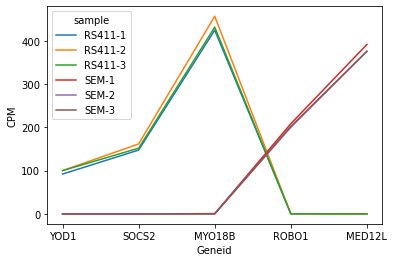

In [12]:
#cpm_lineplot=tidy_df.loc[top5]
#make a mask isin
cpm_lineplot=tidy_df[tidy_df['Geneid'].isin(top5)]
sns.lineplot(data=cpm_lineplot,y='CPM',x='Geneid',hue='sample')

In [13]:
#Plot a heatmap for top 100 most variable genes (log cpm) across all samples
top100list=top100.reset_index()
top100list

,Geneid,variance
0,MED12L,33.446224
1,MYO18B,31.552714
2,SOCS2,28.022328
3,YOD1,27.078354
4,ROBO1,26.633403
...,...,...
95,FBN2,3.363890
96,RHOH,3.342251
97,GJC1,3.304134
98,NAT8L,3.267669


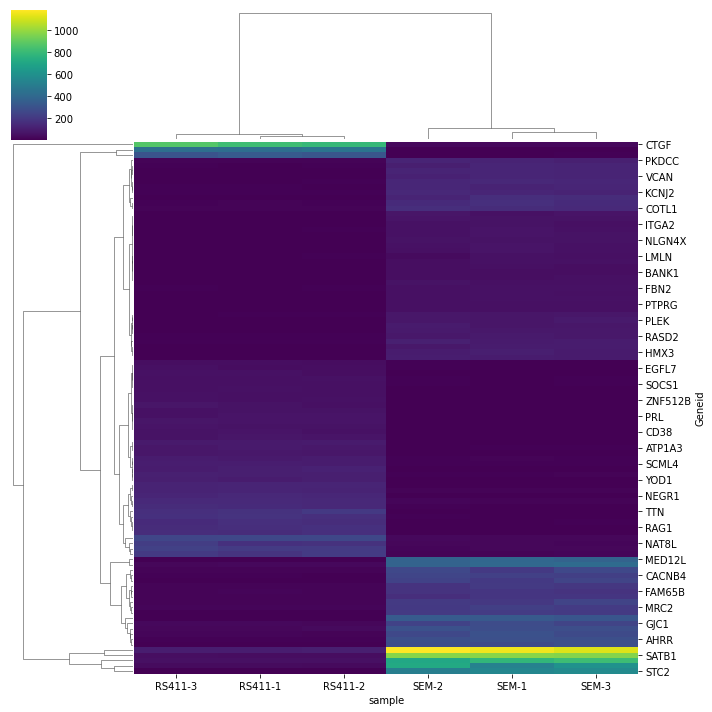

In [14]:
top100_CPM=tidy_df.set_index('Geneid').loc[top100list['Geneid']]
top100_heatmap=top100_CPM.pivot(columns='sample',values='CPM')
sns.clustermap(data=top100_heatmap,cmap='viridis')